# Initialize the environment

In [75]:
import nltk

# Ch. 2 Exercises

1\. ☼ Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [76]:
phrase = ['This', 'is', 'my', 'list', 'of', 'words']

In [77]:
phrase + ['stupidly']

['This', 'is', 'my', 'list', 'of', 'words', 'stupidly']

In [78]:
phrase * 3

['This',
 'is',
 'my',
 'list',
 'of',
 'words',
 'This',
 'is',
 'my',
 'list',
 'of',
 'words',
 'This',
 'is',
 'my',
 'list',
 'of',
 'words']

In [79]:
phrase.index('list')

3

In [80]:
phrase[-3:]

['list', 'of', 'words']

In [81]:
sorted(set(w.lower() for w in phrase))

['is', 'list', 'my', 'of', 'this', 'words']

2\. ☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

In [82]:
from nltk.corpus import gutenberg
len(gutenberg.words('austen-persuasion.txt')) # Number of tokens

98171

In [83]:
len(set(w.lower() for w in gutenberg.words('austen-persuasion.txt'))) # Number of unique words

5835

3\. ☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [84]:
nltk.corpus.brown.raw(categories=['religion'])[:90]

'As/cs a/at result/nn ,/, although/cs we/ppss still/rb make/vb use/nn of/in this/dt distinc'

In [85]:
nltk.corpus.brown.raw(categories=['government'])[:90]

'\n\n\tThe/at Office/nn-tl of/in-tl Business/nn-tl Economics/nn-tl (/( OBE/np )/) of/in the/at'

In [86]:
for fileid in nltk.corpus.webtext.fileids():
    print(fileid)

firefox.txt
grail.txt
overheard.txt
pirates.txt
singles.txt
wine.txt


In [87]:
nltk.corpus.webtext.raw('singles.txt')[:90]

'25 SEXY MALE, seeks attrac older single lady, for discreet encounters.\n35YO Security Guard'

4\. ☼ Read in the texts of the _State of the Union_ addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?

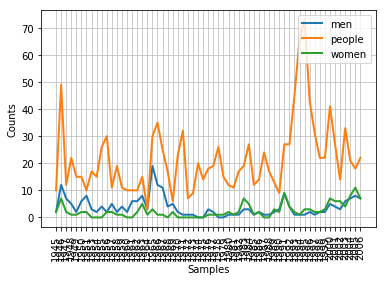

In [88]:
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower() == target)
cfd.plot()

In [89]:
cfd = nltk.ConditionalFreqDist(
    (fileid[:4], w.lower())
    for fileid in state_union.fileids()
    for w in state_union.words(fileid))
cfd.tabulate(samples=['men', 'women', 'people'])

        men  women people 
1945      2      2     10 
1946     12      7     49 
1947      7      2     12 
1948      5      1     22 
1949      2      1     15 
1950      6      2     15 
1951      8      2     10 
1953      3      0     17 
1954      2      0     15 
1955      4      0     26 
1956      2      2     30 
1957      5      2     11 
1958      2      1     19 
1959      4      1     11 
1960      2      0     10 
1961      6      0     10 
1962      6      2     10 
1963      8      5     15 
1964      3      1      3 
1965     19      3     30 
1966     12      1     35 
1967     11      1     25 
1968      4      0     17 
1969      5      2      6 
1970      2      0     23 
1971      1      0     32 
1972      1      0      7 
1973      1      0      9 
1974      0      0     20 
1975      0      0     14 
1976      3      1     18 
1977      2      1     19 
1978      0      1     26 
1979      0      1     15 
1980      1      2     12 
1981      1      1     11 
1

5\. ☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

In [157]:
from nltk.corpus import wordnet as wn
wn.synsets('computer')

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [158]:
word = wn.synset('computer.n.01')
word.member_meronyms()

[]

In [159]:
word.part_meronyms()

[Synset('busbar.n.01'),
 Synset('cathode-ray_tube.n.01'),
 Synset('central_processing_unit.n.01'),
 Synset('chip.n.07'),
 Synset('computer_accessory.n.01'),
 Synset('computer_circuit.n.01'),
 Synset('data_converter.n.01'),
 Synset('disk_cache.n.01'),
 Synset('diskette.n.01'),
 Synset('hardware.n.03'),
 Synset('keyboard.n.01'),
 Synset('memory.n.04'),
 Synset('monitor.n.04'),
 Synset('peripheral.n.01')]

In [160]:
word.substance_meronyms()

[]

In [161]:
word.member_holonyms()

[]

In [162]:
word.part_holonyms()

[Synset('platform.n.03')]

In [163]:
word.substance_holonyms()

[]

6\. ☼ In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

The two languages might have words with the same spelling. Since keys in dictionaries must be unique, the translate object could not contain entries for the words in both languages: from my reading of the documentation, update() would replace the old value with the new value as each language was added. One approach to solving this problem while keeping the universal translation is to add new dictionaries by iterating over them manually, rather than by using the update() method. Basically, for each item, check whether the key already exists. If it does, cast the value as a list and append the new value, rather than overwriting the value.

In [107]:
def combine_dicts(dict1, dict2):
    for key in dict2.keys():
        if key in dict1:
            val = list(dict1[key])
            val += [dict2[key]]
            dict1[key] = val
        else:
            dict1[key] = dict2[key]
    return dict1

dict1 = {'a': 'A', 'b': 'B'}
dict2 = {'a': 'OK', 'c': 'D'}
dict3 = {'a': 'Yay', 'c': 'see', 'f': 'eff'}

dict1 = combine_dicts(dict1, dict2)
dict1 = combine_dicts(dict1, dict3)
print(dict1)

{'a': ['A', 'OK', 'Yay'], 'b': 'B', 'c': ['D', 'see'], 'f': 'eff'}


That approach, of course, loses the context of what word comes from what language, but given the weirdness of a function that will translate an arbitrary string to English without caring what language it's from, that's probably an acceptable loss in this case.

This solution as written also assumes that dict2 values don't come in the form of a list. Where they do, we'll end up with inappropriately nested lists. But given the weirdness that results from casting string to list, I'm considering a more robust solution beyond the scope of this assignment. If I knew type-checking, better solutions might present themselves.

7\. ☼ According to Strunk and White's _Elements of Style_, the word _however_, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: _However you advise him, he will probably do as he thinks best._ (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the _LanguageLog_ posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [108]:
nltk.Text(nltk.corpus.gutenberg.words()).concordance('However')

Displaying 25 of 673 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

8\. ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. [4.4](http://www.nltk.org/book/ch02.html#fig-cfd-gender)).

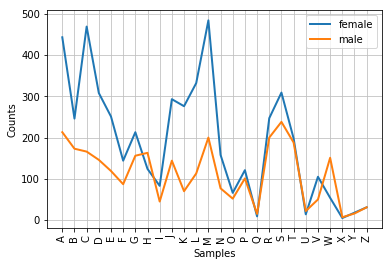

In [168]:
from nltk.corpus import names
cfd = nltk.ConditionalFreqDist(
    (fileid[:-4], name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

9\. ◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as _monstrous_ in _Moby Dick_ and in _Sense and Sensibility_?

In [2]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
bible = gutenberg.words('bible-kjv.txt')
milton = gutenberg.words('milton-paradise.txt')

def words_set(word_list):
    return set(w.lower() for w in word_list)

print('Length: Bible -',len(bible), 'Milton -',len(milton))

Length: Bible - 1010654 Milton - 96825


In [6]:
print('Vocab: Bible -',len(words_set(bible)), 'Milton -', len(words_set(milton)))

Vocab: Bible - 12767 Milton - 9021


In [8]:
print('Richness: Bible -', len(words_set(bible))/len(bible), 'Milton -', len(words_set(milton))/len(milton))

Richness: Bible - 0.012632414258490047 Milton - 0.09316808675445391


10\. ◑ Read the BBC News article: _UK's Vicky Pollards_ 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on _LanguageLog_, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

11\. ◑ Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

12\. ◑ Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

13\. ◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

14\. ◑ Define a function `supergloss(s)` that takes a synset `s` as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of `s`.

15\. ◑ Write a program to find all words that occur at least three times in the Brown Corpus.

16\. ◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](http://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

17\. ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

18\. ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

19\. ◑ Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

20\. ◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

21\. ◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

22\. ◑ Define a function `hedge(text)` which processes a text and produces a new version with the word `'like'` between every third word.

23\. ★ Zipf's Law: Let _f(w)_ be the frequency of a word _w_ in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. _f × r = k_, for some constant _k_). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
<ol type="a">
<li>Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?</li>
<li>Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to `import random` first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?</li>
</ol>

24\. ★ Modify the text generation program in [2.2](http://www.nltk.org/book/ch02.html#code-random-text) further, to do the following tasks:
<ol type="a">
<li>Store the _n_ most likely words in a list `words` then randomly choose a word from the list using `random.choice()`. (You will need to `import random` first.)</li>
<li>Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.</li>
<li>Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.</li>
</ol>

25\. ★ Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the `udhr` corpus and limit your searches to files in the Latin-1 encoding.

26\. ★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.

27\. ★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun _dog_ has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

28\. ★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by ([Miller & Charles, 1998](http://www.nltk.org/book/bibliography.html#millercharles1998)): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

29\. ◑ We have been using sets to store vocabularies. Try the following Python expression: set(sent3) < set(text1). Experiment with this using different arguments to set(). What does it do? Can you think of a practical application for this?